In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [67]:
def fun(x):
    f = 2*x +3*np.sin(4*x)-np.exp(x)
    return f

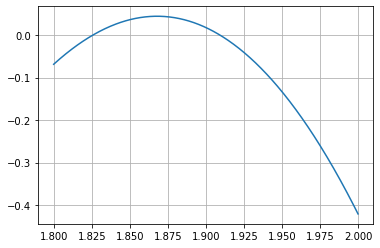

In [68]:
xpoints = np.linspace(1.8,2,500) 
fpoints = fun(xpoints)

plot1 = plt.plot(xpoints, fpoints)
plt.grid(True)
plt.show(plot1)

#let's see our new function before doing anything


In [69]:
#we can see there is a root somewhere between 0 and 0.2

In [70]:
def g1(x):
    g=(-3*np.sin(4*x)+np.exp(x))/2
    return g
#and this is our g(x)

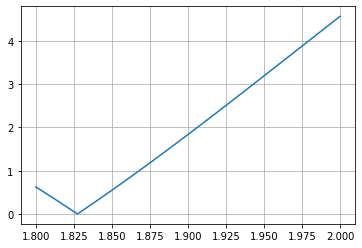

In [71]:
#for the method to be succesful we need |g'(x)|<1 for x in the area of the root (o-0.2)
def gg1(x):
    g=(-12*np.cos(4*x)+np.exp(x))/2
    return g

xpoints = np.linspace(1.8,2,500) 
gpoints = abs(gg1(xpoints))

plot1 = plt.plot(xpoints, gpoints)
plt.grid(True)
plt.show(plot1)



In [72]:
def g2(x):
    g = np.log(2*x+3*np.sin(4*x))
    return g

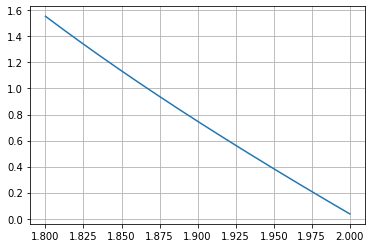

In [73]:
def gg2(x):
    g2 = (12*np.cos(4*x)+2)/(3*np.sin(4*x)+2*x)
    return g2
xpoints = np.linspace(1.8,2,500) 
gpoints = abs(gg2(xpoints))

plot2 = plt.plot(xpoints, gpoints)
plt.grid(True)
plt.show(plot2)

In [74]:
#we now have our g
#time to employ the method

In [109]:
def picard(xo,error): 
    n = 0
    i = 0
    N = []
    err = []
    while i==0:
        n = n+1
        x1 = g2(xo)
        N.append(n)
        er = x1 - xo
        err.append(er)
        xo = x1
        if er<=error:
            break
    print("Number of iterations:", n)
    fig, ax = plt.subplots()
    ax.plot(N, err, marker='o')
    ax.set_yscale('log')
    ax.set(xlabel='iteration', ylabel='error')
    ax.grid()
    tick_spacing = 2
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing)) 
    print("It approaches this value according to the graph:")
    plt.show()
    return x1

For error smaller than 10^-3
Number of iterations: 5
It approaches this value according to the graph:


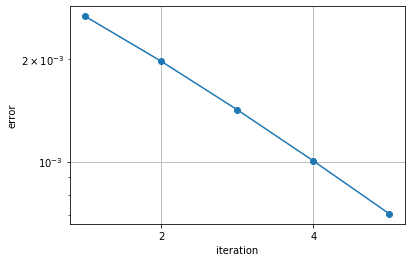

The root is: 1.907766100591039
For error smaller than 10^-6
Number of iterations: 23
It approaches this value according to the graph:


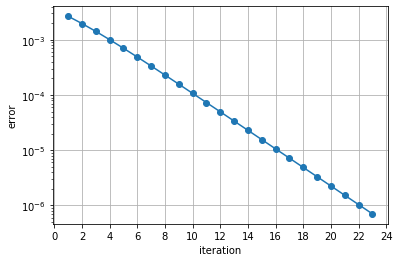

The root is: 1.9093081689942637
For error smaller than 10^-12
Number of iterations: 58
It approaches this value according to the graph:


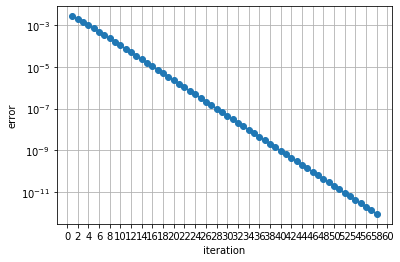

The root is: 1.909309651335407


In [110]:
xo = 1.9
print("For error smaller than 10^-3")
print("The root is:", picard(xo,10**(-3)))
print("For error smaller than 10^-6")
print("The root is:", picard(xo,10**(-6)))
print("For error smaller than 10^-12")
print("The root is:", picard(xo,10**(-12)))

In [111]:
def conf(xo,I): 
    n = 0
    N = [0]
    #Let us now calculate the error thinking the last value we get is the real root
    solution = [xo]
    while n < I:
        n = n+1
        xo = g2(xo)
        N.append(n)
        solution.append(xo)
    print("Iterations:", (len(N)-1), "while we were given:", I)
    print("Solutions:", (len(solution)-1))
    
    L = len(solution)
    root = solution[L-1]
    dgdx = gg2(root)

    
    error_n = np.array([solution[L-1]-solution[0]])
    error_np1 = np.array([solution[L-1]-solution[1]])

    for i in range (1,L-1):
        error_n = np.append(error_n, [solution[L-1]-solution[i]])
        error_np1 = np.append(error_np1, [solution[L-1]-solution[i+1]])

    error_np1_predict = dgdx*error_n

    fig, ax = plt.subplots()
    ax.plot(abs(error_n), abs(error_np1_predict))
    ax.plot(abs(error_n),abs(error_np1))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set(xlabel='error_n', ylabel='error_n+1')
    plt.xlim(left=abs(error_n[-2]))
    ax.grid()
    plt.show()
    

Iterations: 58 while we were given: 58
Solutions: 58


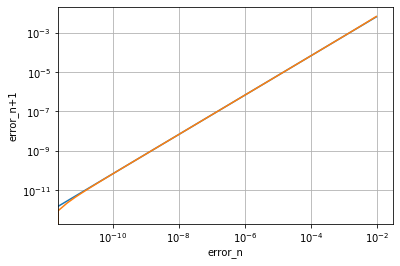

In [112]:
conf(xo,58)